In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#### Load Data
- X_train is the dataset of 28 X 28 images of handwritten digits that the model will be trained on
- X_test is the dataset of labels that correspond to X_train
- y_train is the dataset of 28 X 28 imahes of handwritten digits that the model will be tested on
- y_test is thw dataset of labels that correspond to X_test

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
X_train.max()

255

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use is

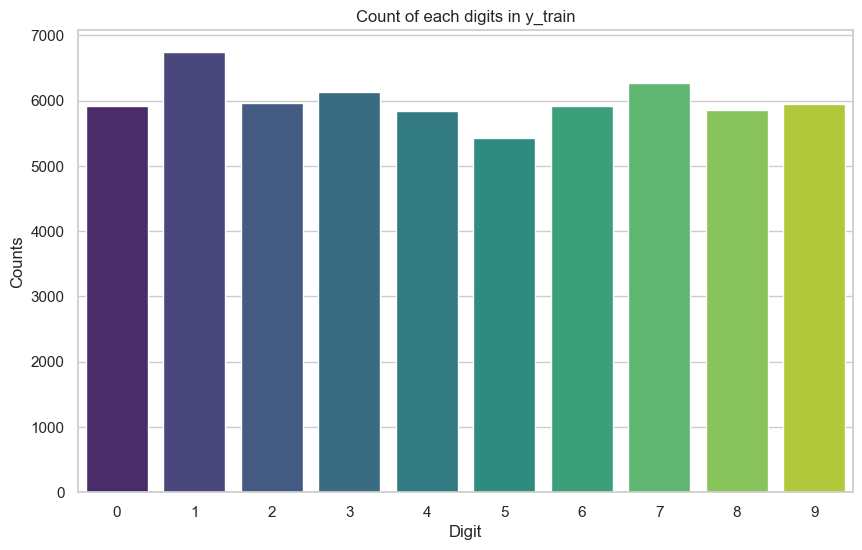

In [6]:
# Check the count of each digit present in y_train
from collections import Counter
digits = Counter(y_train)

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))

sns.barplot(x=list(digits.keys()), y=list(digits.values()), palette='viridis')

plt.xlabel("Digit")
plt.ylabel("Counts")
plt.title("Count of each digits in y_train")

plt.show()

#### Check for nan values

In [7]:
np.isnan(X_train).any()

False

In [8]:
np.isnan(y_train).any()

False

#### Normalizing and Reshaping the data

Since the values in our X_train dataset are 28 X 28 images, our input shape must be specified so that our model will know what is being inputed.

In [9]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

### Label Encoding

The labels for the training and testing dataset are currently categorical and is not continous. To include categorical dataset in our model, our labels should be converted to on-hor encodings.

For example, 2 becomes [0, 0, 1, 0, 0, 0, 0, 0, 0] and 7 becomes [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [10]:
# Show the forst training examples
print(f'Training sample:\n{X_train[0]}\n')
print(f'Training label:\n {y_train[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [11]:
class_names = ['Zeros','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
len(class_names)

10

Text(0.5, 1.0, 'Nine')

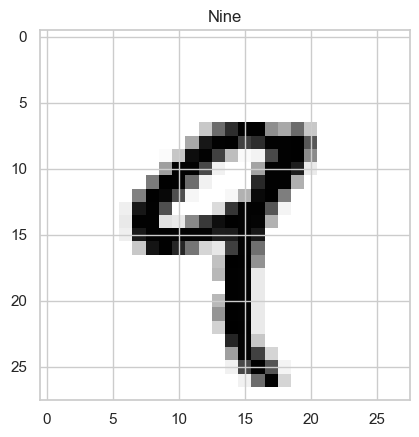

In [12]:
index_of_choice = 4
plt.imshow(X_train[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[y_train[index_of_choice]])

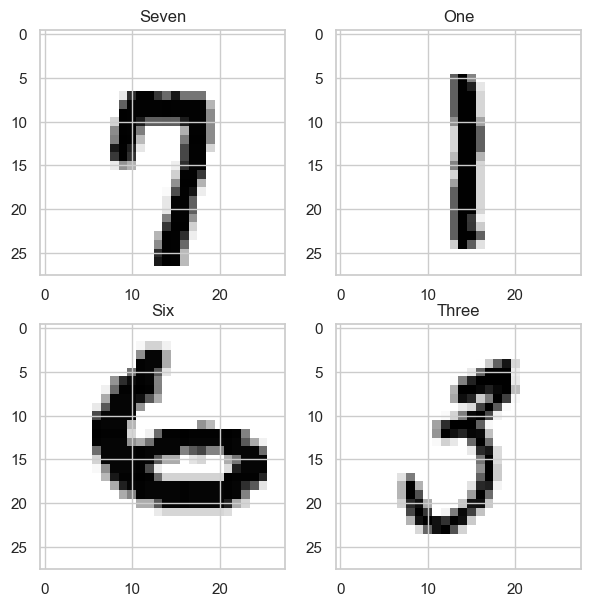

In [13]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[y_train[rand_index]])

#### Building a multi-class classificaton model
For our multi-class classification model, we can use a similar architecture to our binary class classification. However, we're going to have to tweak a few things

- Input shape = 28X28 (The shape of one image)
- Output shape = 10(One per class of HandWritten digits)
- Loss function = tf.keras.lossesCategoricalCrossentrophy()
    - If your labels are one-hot encoded, use CategoricalCrossentrophy()
    - If your labels are integer form, use SparceCategoricalCrossentrophy()
- Output layer activation = Softmaax(not sigmoid)

In [14]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28, 1))])
flatten_model.output_shape

(None, 784)

In [15]:
28*28

784

In [16]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
tf.one_hot(y_train[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [18]:
# Set Random Seed
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history_1 = model_1.fit(X_train, tf.one_hot(y_train, depth=10),
                     epochs=50,
                     validation_data = (X_test, tf.one_hot(y_test, depth=10)))

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5495 - accuracy: 0.8083 - val_loss: 0.4161 - val_accuracy: 0.8967
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3624 - accuracy: 0.9070 - val_loss: 0.2686 - val_accuracy: 0.9315
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2438 - accuracy: 0.9335 - val_loss: 0.2473 - val_accuracy: 0.9379
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1956 - accuracy: 0.9482 - val_loss: 0.1980 - val_accuracy: 0.9472
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1502 - accuracy: 0.9580 - val_loss: 0.1667 - val_accuracy: 0.9573
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1380 - accuracy: 0.9619 - val_loss: 0.1415 - val_accuracy: 0.9643
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1149 - accuracy: 0.9690 - val_loss: 0.1408 - val_accuracy:

In [19]:
loss, accuracy = model_1.evaluate(X_test, tf.one_hot(y_test, depth=10))
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4063 - accuracy: 0.9681
0.4063017964363098
0.9681000113487244


In [20]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: title={'center': 'Non-normalized data'}>

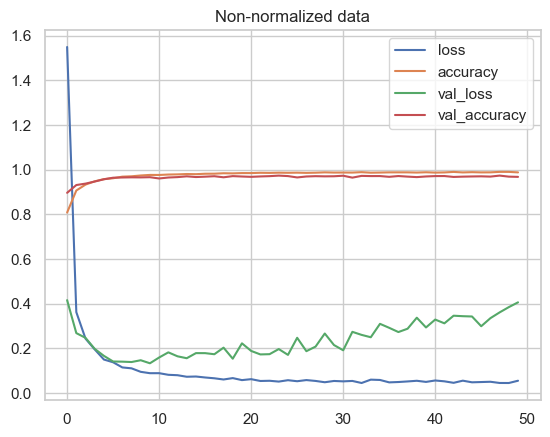

In [21]:
# Plot the non-normalized data loss curves
pd.DataFrame(history_1.history).plot(title='Non-normalized data')

In [22]:
# Check the max and min values of the training data
X_train.min(), X_train.max()

(0, 255)

In [23]:
X_test.min(), X_test.max()

(0, 255)

Neural Networks prefer data to be scales (or normmalize), this means they like to have the numbers in the tensors they find patterns between 0 & 1

In [24]:
# We can get our training and testing data between 0 & 1 by dividing by their maximum
norm_X_train = X_train / 255.0
norm_X_test = X_test / 255.0

# Check the min and max values of the scaled training data
norm_X_train.min(), norm_X_train.max(), norm_X_test.min(), norm_X_test.max()

(0.0, 1.0, 0.0, 1.0)

In [25]:
# Now our dataset is normalized, let's build a model to find patterns in it
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

histroy_2 = model_2.fit(norm_X_train,
                       y_train,
                       epochs=50,
                       validation_data=(norm_X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2591 - accuracy: 0.9251 - val_loss: 0.1319 - val_accuracy: 0.9591
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1124 - accuracy: 0.9658 - val_loss: 0.1216 - val_accuracy: 0.9621
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0813 - accuracy: 0.9747 - val_loss: 0.0808 - val_accuracy: 0.9754
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.0757 - val_accuracy: 0.9760
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0853 - val_accuracy: 0.9740
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0762 - val_accuracy: 0.9778
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0768 - val_accuracy:

In [26]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: title={'center': 'Normalized data'}>

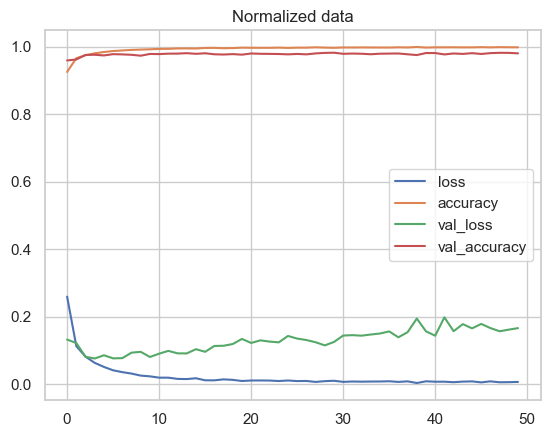

In [27]:
#plot the normalized data loss curves
pd.DataFrame(histroy_2.history).plot(title='Normalized data')

In [28]:
# Finding the ideal learnig curve

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epcoh: 1e-3 * 10**(epcoh/20))

histroy_3 = model_3.fit(norm_X_train,
                       y_train,
                       epochs=50,
                       validation_data=(norm_X_test, y_test),
                       callbacks=[lr_schedular])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2549 - accuracy: 0.9254 - val_loss: 0.1320 - val_accuracy: 0.9590 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1152 - accuracy: 0.9647 - val_loss: 0.1212 - val_accuracy: 0.9641 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0847 - accuracy: 0.9734 - val_loss: 0.0852 - val_accuracy: 0.9722 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0692 - accuracy: 0.9779 - val_loss: 0.1028 - val_accuracy: 0.9702 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.1174 - val_accuracy: 0.9650 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0559 - accuracy: 0.9816 - val_loss: 0.0954 - val_accuracy: 0.9716 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

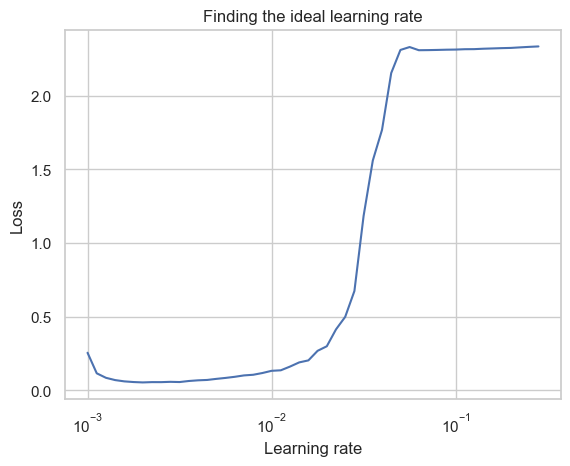

In [29]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(50)/20))
plt.semilogx(lrs, histroy_3.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [30]:
# Make predictions with our model
y_probs = model_2.predict(norm_X_test)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.87067699e-27, 1.81241815e-22, 5.02926459e-20, 2.14752399e-17,
        1.24363330e-29, 4.06040688e-30, 4.29227794e-30, 1.00000000e+00,
        8.89010187e-26, 6.33955247e-25],
       [2.10484551e-33, 5.40594200e-25, 1.00000000e+00, 1.05705849e-27,
        0.00000000e+00, 3.07609074e-33, 1.02874865e-30, 0.00000000e+00,
        7.56250936e-26, 0.00000000e+00],
       [3.33012999e-21, 1.00000000e+00, 5.37073370e-13, 1.42489699e-22,
        5.20107720e-13, 2.49361487e-17, 3.39314406e-13, 1.86679692e-18,
        1.82623469e-12, 2.54155774e-23],
       [1.00000000e+00, 2.45833618e-26, 5.47566025e-24, 5.64057239e-20,
        7.68245317e-18, 2.14039496e-22, 1.92995631e-15, 1.19141315e-23,
        4.48544634e-25, 3.47172833e-21],
       [1.33352320e-19, 1.80298242e-17, 6.42947400e-16, 1.15415712e-25,
        1.00000000e+00, 1.48190258e-28, 1.61536819e-26, 7.29075139e-15,
        2.03780221e-23, 8.43609893e-09]], dtype=float32)

In [31]:
loss, accuracy = model_2.evaluate(norm_X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1658 - accuracy: 0.9802
0.16577401757240295
0.9801999926567078


In [32]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.8706770e-27, 1.8124182e-22, 5.0292646e-20, 2.1475240e-17,
        1.2436333e-29, 4.0604069e-30, 4.2922779e-30, 1.0000000e+00,
        8.8901019e-26, 6.3395525e-25], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Seven')

In [33]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:15]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)

array([[ 970,    1,    0,    2,    0,    2,    2,    1,    1,    1],
       [   1, 1123,    1,    0,    0,    1,    3,    1,    5,    0],
       [   2,    3,  997,   11,    0,    0,    0,    5,   14,    0],
       [   0,    0,    2,  996,    0,    4,    0,    3,    4,    1],
       [   2,    0,    4,    0,  967,    0,    2,    1,    1,    5],
       [   2,    0,    0,   11,    1,  867,    6,    0,    2,    3],
       [   4,    2,    0,    1,    4,    6,  940,    0,    1,    0],
       [   1,    1,    8,    1,    1,    0,    0, 1002,    6,    8],
       [   3,    1,    1,    7,    1,    1,    0,    2,  955,    3],
       [   1,    4,    1,    3,    7,    3,    1,    2,    2,  985]],
      dtype=int64)

### What pattern is our model learning?

In [35]:
#Find the layers of our most recent model
model_2.layers

In [36]:
# Extract a particular layer
model_2.layers[1]

In [37]:
# Get the patterns of a layer in our network
weigths, biases = model_2.layers[1].get_weights()

#Shapes
weigths, weigths.shape

(array([[-0.01035789,  0.01050391,  0.07732712, ..., -0.04222967,
          0.05637637,  0.07863311],
        [-0.01588188,  0.02106627,  0.0802097 , ..., -0.07814791,
         -0.06170884, -0.0227005 ],
        [-0.06511187,  0.00607623, -0.01931429, ...,  0.04711796,
         -0.0452994 ,  0.01977082],
        ...,
        [ 0.05560727, -0.00766508,  0.05967155, ..., -0.00470413,
         -0.05048   ,  0.0309468 ],
        [ 0.00018261, -0.05212739, -0.03868114, ...,  0.05184126,
          0.07325958, -0.0705126 ],
        [ 0.05715203, -0.01467257, -0.01857907, ...,  0.08133735,
         -0.0132734 ,  0.03506586]], dtype=float32),
 (784, 100))

In [38]:
biases, biases.shape

(array([-0.03651172, -0.2864562 , -0.28960168,  0.08654989, -0.21206659,
        -0.26302028, -0.3458737 , -0.0166655 , -0.28804106, -0.11484902,
        -0.14479607,  0.18706432, -0.2764723 , -0.25361016,  0.2334104 ,
         0.21801475, -0.28970987, -0.30761117, -0.38437042,  0.33439562,
        -0.18519361,  0.16636701,  0.28305286,  0.05002276,  0.1162415 ,
         0.28152123, -0.03681402,  0.00763329,  0.25998724, -0.1069258 ,
        -0.08028126, -0.10905379, -0.02823043,  0.15721008,  0.5130259 ,
         0.04822248,  0.00452585, -0.05716225, -0.10798392,  0.24180783,
        -0.06134944, -0.1162069 , -0.12843601, -0.41195008, -0.14611627,
        -0.49776822,  0.11774318,  0.02381694,  0.19115758, -0.12468327,
         0.04265618, -0.01564382, -0.13758896, -0.00565915, -0.09691868,
        -0.28497067,  0.41502512, -0.17564683, -0.10857352, -0.27378115,
        -0.119353  , -0.06032985,  0.24777703, -0.05246947,  0.1041839 ,
        -0.12214054,  0.04093437,  0.04193194, -0.2

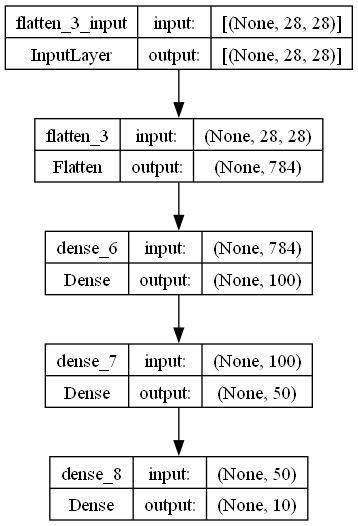

In [39]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)